In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/MENS_CLOTHING_SALES_2018 .csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 4 columns):
AnnualSales        385 non-null float64
Sales              385 non-null float64
SFloorSize         400 non-null int64
TotalInvestment    385 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [3]:
# Task 1: Data preparation for clustering

In [4]:
## Identify significant measurements/values
print('----Annual Sales----')
print(df['AnnualSales'].describe())
print('-------Sales-------')
print(df['Sales'].describe())
print('----SFloorSize----')
print(df['SFloorSize'].describe())
print('----Total Investment----')
print(df['TotalInvestment'].describe())

----Annual Sales----
count    3.850000e+02
mean     8.320083e+05
std      5.859337e+05
min      5.000000e+04
25%      4.953400e+05
50%      6.942270e+05
75%      9.768170e+05
max      5.000000e+06
Name: AnnualSales, dtype: float64
-------Sales-------
count      385.000000
mean      6353.494951
std       3770.794382
min        300.000000
25%       3904.200000
50%       5333.333000
75%       7822.003000
max      27000.000000
Name: Sales, dtype: float64
----SFloorSize----
count     400.000000
mean      144.875000
std       114.562716
min         0.000000
25%        80.000000
50%       117.000000
75%       180.000000
max      1214.000000
Name: SFloorSize, dtype: float64
----Total Investment----
count    3.850000e+02
mean     8.494850e+04
std      1.322060e+05
min      4.000000e+03
25%      3.720704e+04
50%      4.506689e+04
75%      7.889412e+04
max      1.800000e+06
Name: TotalInvestment, dtype: float64


In [5]:
## Further identify erronous values
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of RegDens
ansales_dist = sns.distplot(df['AnnualSales'].dropna(), bins=100)
plt.show()
# Distribution of MedHHInc
sales_dist = sns.distplot(df['Sales'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
floorsize_dist = sns.distplot(df['SFloorSize'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
totalinvest_dist = sns.distplot(df['TotalInvestment'].dropna(), bins=100)
plt.show()

C:\Users\rickm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

C:\Users\rickm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

C:\Users\rickm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

C:\Users\rickm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

In [6]:
## Remove SFloorSize is 0 as all other columns are empty with these rows.
df = df[df['SFloorSize'] >= 1]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 1 to 400
Data columns (total 4 columns):
AnnualSales        385 non-null float64
Sales              385 non-null float64
SFloorSize         385 non-null int64
TotalInvestment    385 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.0 KB


In [7]:
## Identify underperforming store & remove

In [8]:
# Task 2: The first clustering model

In [9]:
## Scale values for clustering model consumption
from sklearn.preprocessing import StandardScaler

df2 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X = df2.as_matrix()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
## Perform kmeans using a normalized set of data
from sklearn.cluster import KMeans

rs = 10

model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y
print("Number of items per cluster:")
print(df2['Cluster_ID'].value_counts())

Sum of intra-cluster distance: 874.5228798682944
Centroid locations:
[ 0.50743611  1.57186338 -0.49516289  0.0042749 ]
[-0.41745683 -0.37818594 -0.21929198 -0.20482358]
[ 1.44661706 -0.31322619  1.8720278   1.06703419]
Number of items per cluster:
1    262
0     73
2     50
Name: Cluster_ID, dtype: int64


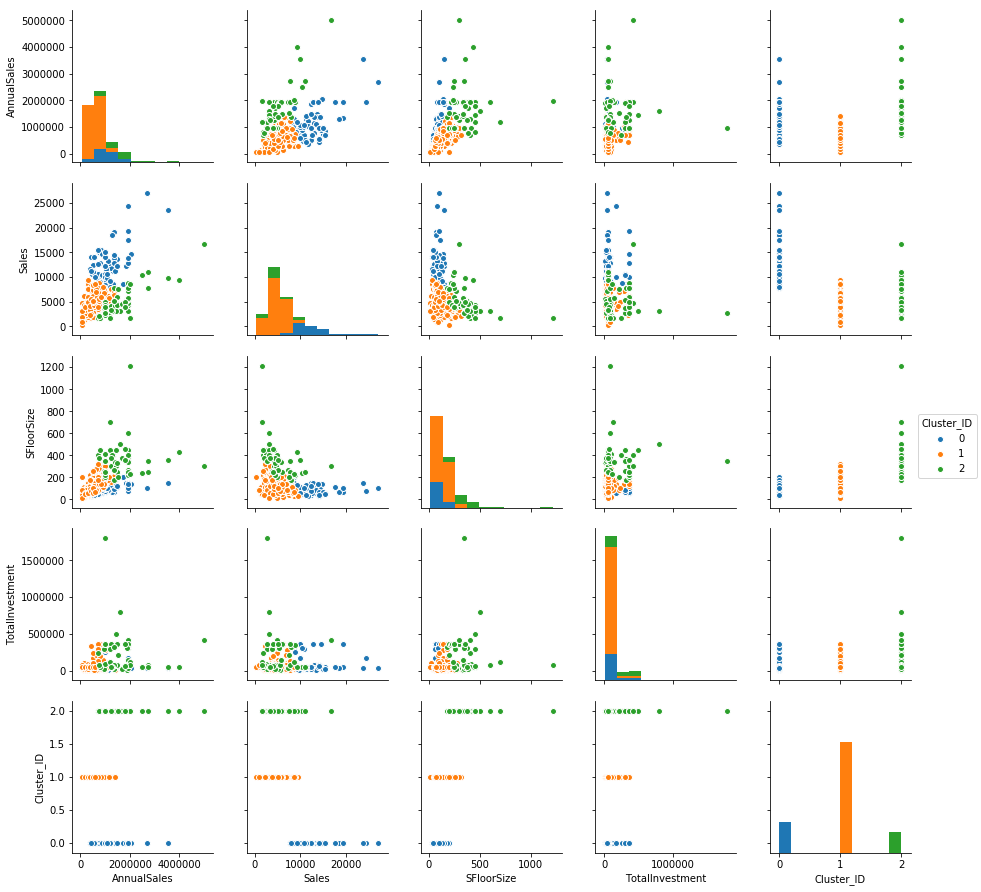

In [11]:
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

In [12]:
## Use raw values for clustering to see how normalization effects the outcome
from sklearn.preprocessing import StandardScaler

df1 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X = df1.as_matrix()

In [13]:
## Perform kmeans using a raw(un-normalized) set of data
from sklearn.cluster import KMeans

rs = 10

model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y
print("Number of items per cluster:")
print(df2['Cluster_ID'].value_counts())

Sum of intra-cluster distance: 38156411634800.38
Centroid locations:
[4.72009620e+05 5.24558196e+03 1.04478873e+02 5.86850646e+04]
[2.26414056e+06 1.01839560e+04 3.07125000e+02 1.45070742e+05]
[1.05237606e+06 7.16357148e+03 1.84771429e+02 1.11164213e+05]
Number of items per cluster:
0    213
2    140
1     32
Name: Cluster_ID, dtype: int64


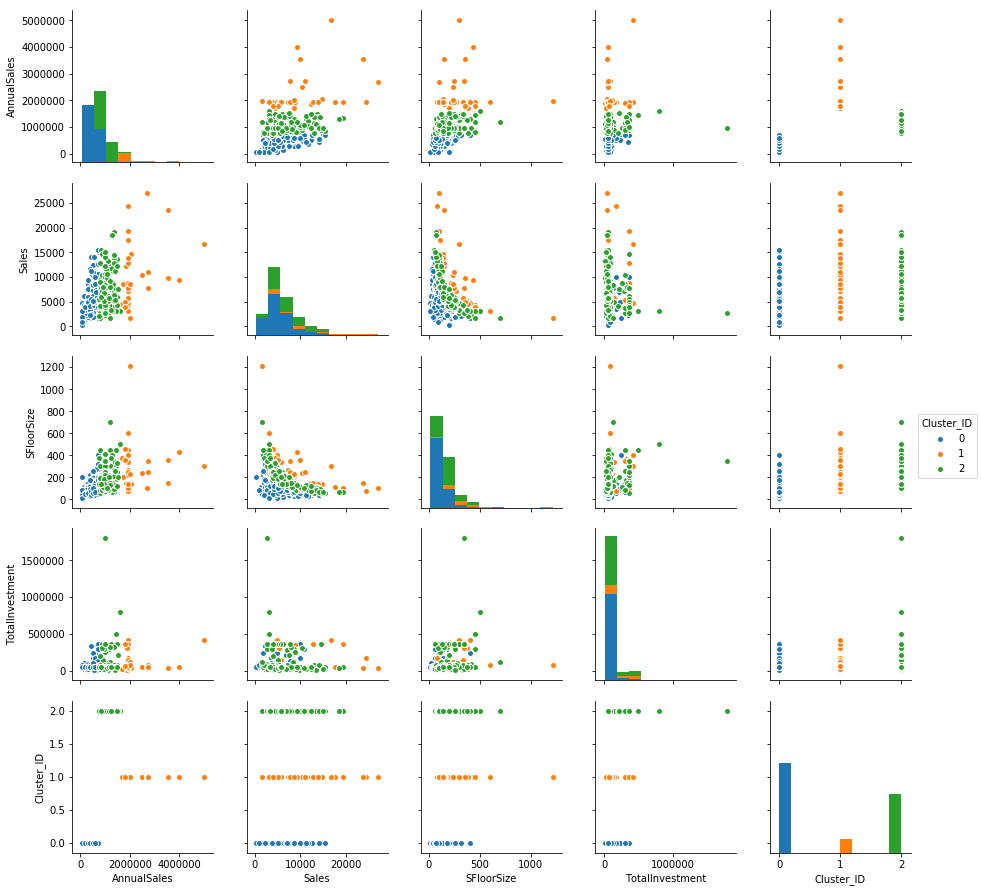

In [14]:
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

Distribution for cluster 0


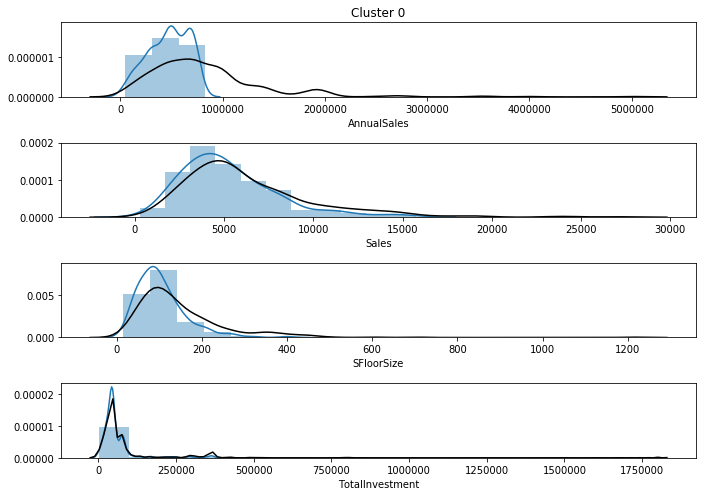

Distribution for cluster 1


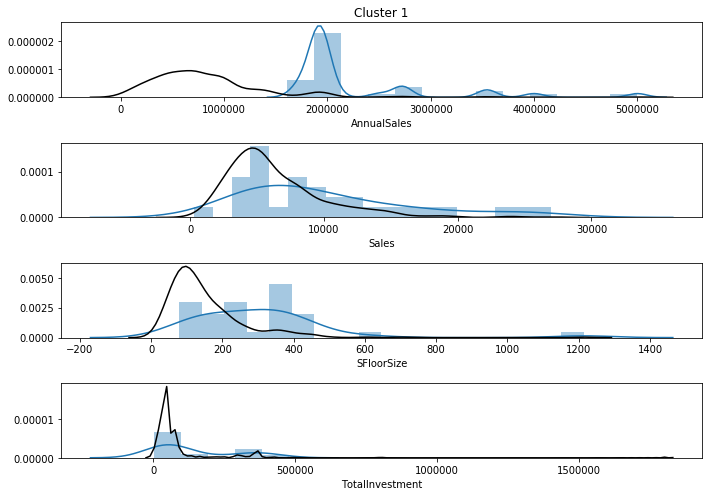

In [15]:
# Ignore warnings to make it a bit more concise
import warnings
warnings.filterwarnings("ignore")


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']
n_bins = 20
# inspecting cluster 0 and 1
clusters_to_inspect = [0,1]
for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))
    # create subplots
    fig, ax = plt.subplots(nrows=4, figsize=(10,7))
    ax[0].set_title("Cluster {}".format(cluster))
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")
    plt.tight_layout()
    plt.show()

In [16]:
# Task 3 : Refining the clustering model

In [17]:
## Rescale as X is not suitable anymore
X = df2.as_matrix()
scaler = StandardScaler()
X = scaler.fit_transform(X)

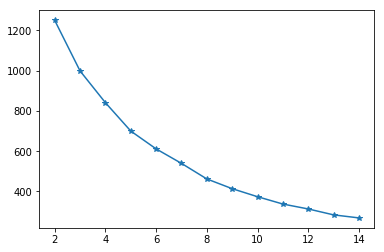

In [29]:
## Test using elbow to find optimal K
clusters = []
inertia_vals = []

for k in range(2, 15, 1):
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [31]:
## Test using sillohette to find optimal K
from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X, clusters[1].predict(X)), '\n')
print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X, clusters[2].predict(X)), '\n')
print(clusters[3])
print("Silhouette score for k=5", silhouette_score(X, clusters[3].predict(X)), '\n')
print(clusters[4])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)), '\n')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=3 0.45928323085799566 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.45727119115279746 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=5 0.46082610668962304 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=6 0.45727119115279746 



Sum of intra-cluster distance: 699.5646593223414
Centroid locations:
[ 0.30285607 -0.02948842  0.22905858  0.04775096  1.25690973]
[-0.6233414  -0.34736463 -0.40741214 -0.20375546 -0.86342161]
[ 0.83121222  2.18362698 -0.53069942 -0.11552992  0.74839807]
[ 0.24746338 -0.94601412  1.7664719  12.98944629  1.26745864]
[ 1.77779637 -0.25223325  2.16568113  0.78029067  0.57636235]
Cluster membership
1    207
0    101
2     39
4     37
3      1
Name: Cluster_ID, dtype: int64


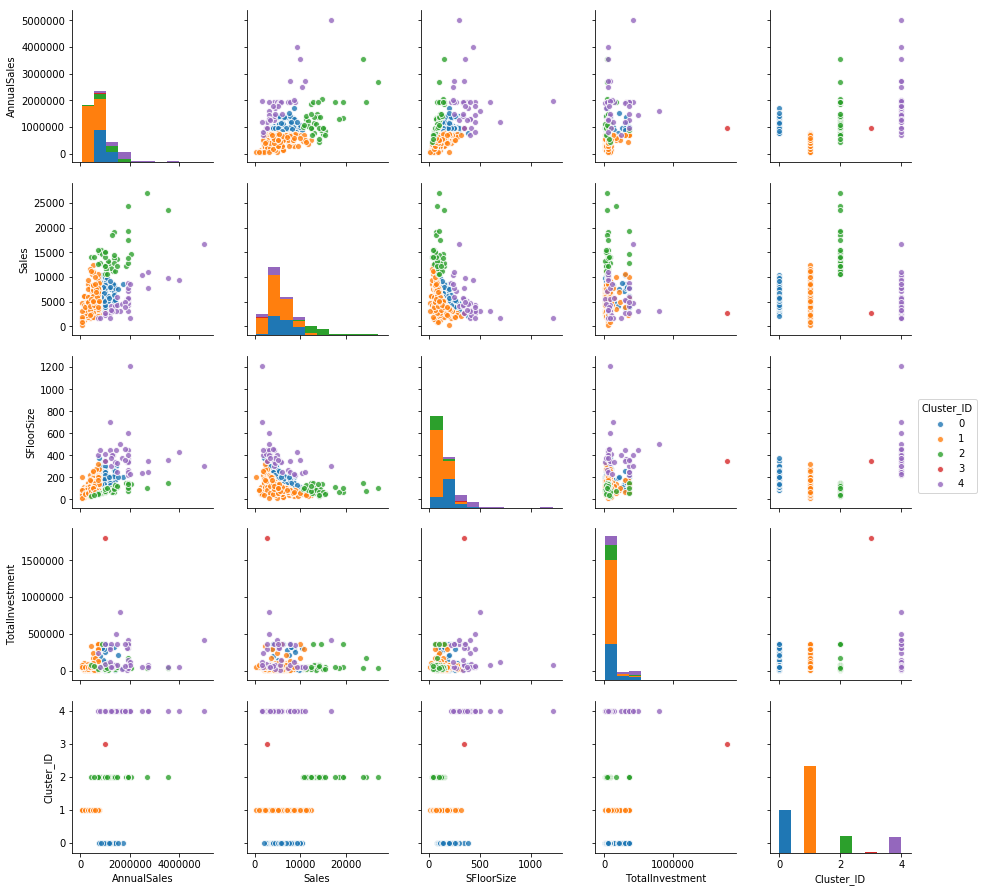

In [35]:
## k=5 is just better than k=3 so it will be used for the number of clusters
model = KMeans(n_clusters=5, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
y = model.predict(X)
df2['Cluster_ID'] = y

print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster_ID', plot_kws={'alpha': 0.8})
plt.show()

In [ ]:
## 3 is just used to capture the outliers